In [10]:
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.colors import Normalize
plt.rcParams["svg.fonttype"] = "none"
from matplotlib_venn import venn2

In [2]:
cluster0_all = pd.read_csv('/ceph/hpc/home/novljanj/data_storage/projects/smOOPS_paper/Data/STRING_GO_analysis/enrichment_cluster0.tsv', sep='\t')
cluster1_all = pd.read_csv('/ceph/hpc/home/novljanj/data_storage/projects/smOOPS_paper/Data/STRING_GO_analysis/enrichment_cluster1.tsv', sep='\t')

cluster1_all["Cluster"] = "All smOOPs Cluster 1"
cluster0_all["Cluster"] = "All smOOPs Cluster 0"

size_dict = {
            "All smOOPs Cluster 1": 324, 
            "All smOOPs Cluster 0": 1038, 
             }

all_enrichment = pd.concat([cluster0_all, cluster1_all])
all_enrichment["#category"].unique()
all_enrichment

,#category,term ID,term description,observed gene count,background gene count,strength,signal,false discovery rate,matching proteins in your network (IDs),matching proteins in your network (labels),Cluster
0,GO Process,GO:0007275,Multicellular organism development,447,3154,0.25,1.12,5.980000e-33,"10090.ENSMUSP00000000312,10090.ENSMUSP00000000...","Cdh1,Cdh4,Sec24b,Col6a1,Pcnt,Fkbp10,Ltbp1,Supt...",All smOOPs Cluster 0
1,GO Process,GO:0048731,System development,415,2836,0.26,1.15,9.880000e-33,"10090.ENSMUSP00000000312,10090.ENSMUSP00000000...","Cdh1,Cdh4,Sec24b,Pcnt,Fkbp10,Ltbp1,Kdm7a,Ppard...",All smOOPs Cluster 0
2,GO Process,GO:0032501,Multicellular organismal process,531,4102,0.21,1.03,1.220000e-32,"10090.ENSMUSP00000000312,10090.ENSMUSP00000000...","Cdh1,Cdh4,Sec24b,Col6a1,Pcnt,Jup,Fkbp10,Ltbp1,...",All smOOPs Cluster 0
3,GO Process,GO:0048856,Anatomical structure development,489,3632,0.23,1.07,1.220000e-32,"10090.ENSMUSP00000000312,10090.ENSMUSP00000000...","Cdh1,Cdh4,Hk2,Sec24b,Col6a1,Pcnt,Jup,Fkbp10,Lt...",All smOOPs Cluster 0
4,GO Process,GO:0032502,Developmental process,515,3989,0.21,1.02,6.820000e-31,"10090.ENSMUSP00000000312,10090.ENSMUSP00000000...","Cdh1,Cdh4,Hk2,Sec24b,Col6a1,Pcnt,Jup,Fkbp10,Lt...",All smOOPs Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...
440,InterPro,IPR036236,Zinc finger C2H2 superfamily,74,685,0.86,3.02,2.120000e-36,"10090.ENSMUSP00000008830,10090.ENSMUSP00000012...","Zfp955a,Zfp729b,Scaper,Zfp51,Zfp458,Zfp759,Zfp...",All smOOPs Cluster 1
441,InterPro,IPR013087,Zinc finger C2H2-type,75,725,0.84,2.92,6.740000e-36,"10090.ENSMUSP00000008830,10090.ENSMUSP00000012...","Zfp955a,Zfp729b,Scaper,Zfp51,Zfp458,Zfp759,Zfp...",All smOOPs Cluster 1
442,InterPro,IPR003395,"RecF/RecN/SMC, N-terminal",4,6,1.65,0.52,1.240000e-02,"10090.ENSMUSP00000025930,10090.ENSMUSP00000044...","Smc3,Smc1a,Smc2,Smc5",All smOOPs Cluster 1
443,SMART,SM00349,Krueppel associated box,66,365,1.09,4.57,5.670000e-45,"10090.ENSMUSP00000008830,10090.ENSMUSP00000012...","Zfp955a,Zfp729b,Zfp51,Zfp458,Zfp759,Zfp943,Zfp...",All smOOPs Cluster 1


/tmp/ipykernel_178410/2008401527.py:68: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_df.groupby('Cluster')
/tmp/ipykernel_178410/2008401527.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['-log(FDR)'] = -np.log10(plot_data['false discovery rate'])
/tmp/ipykernel_178410/2008401527.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


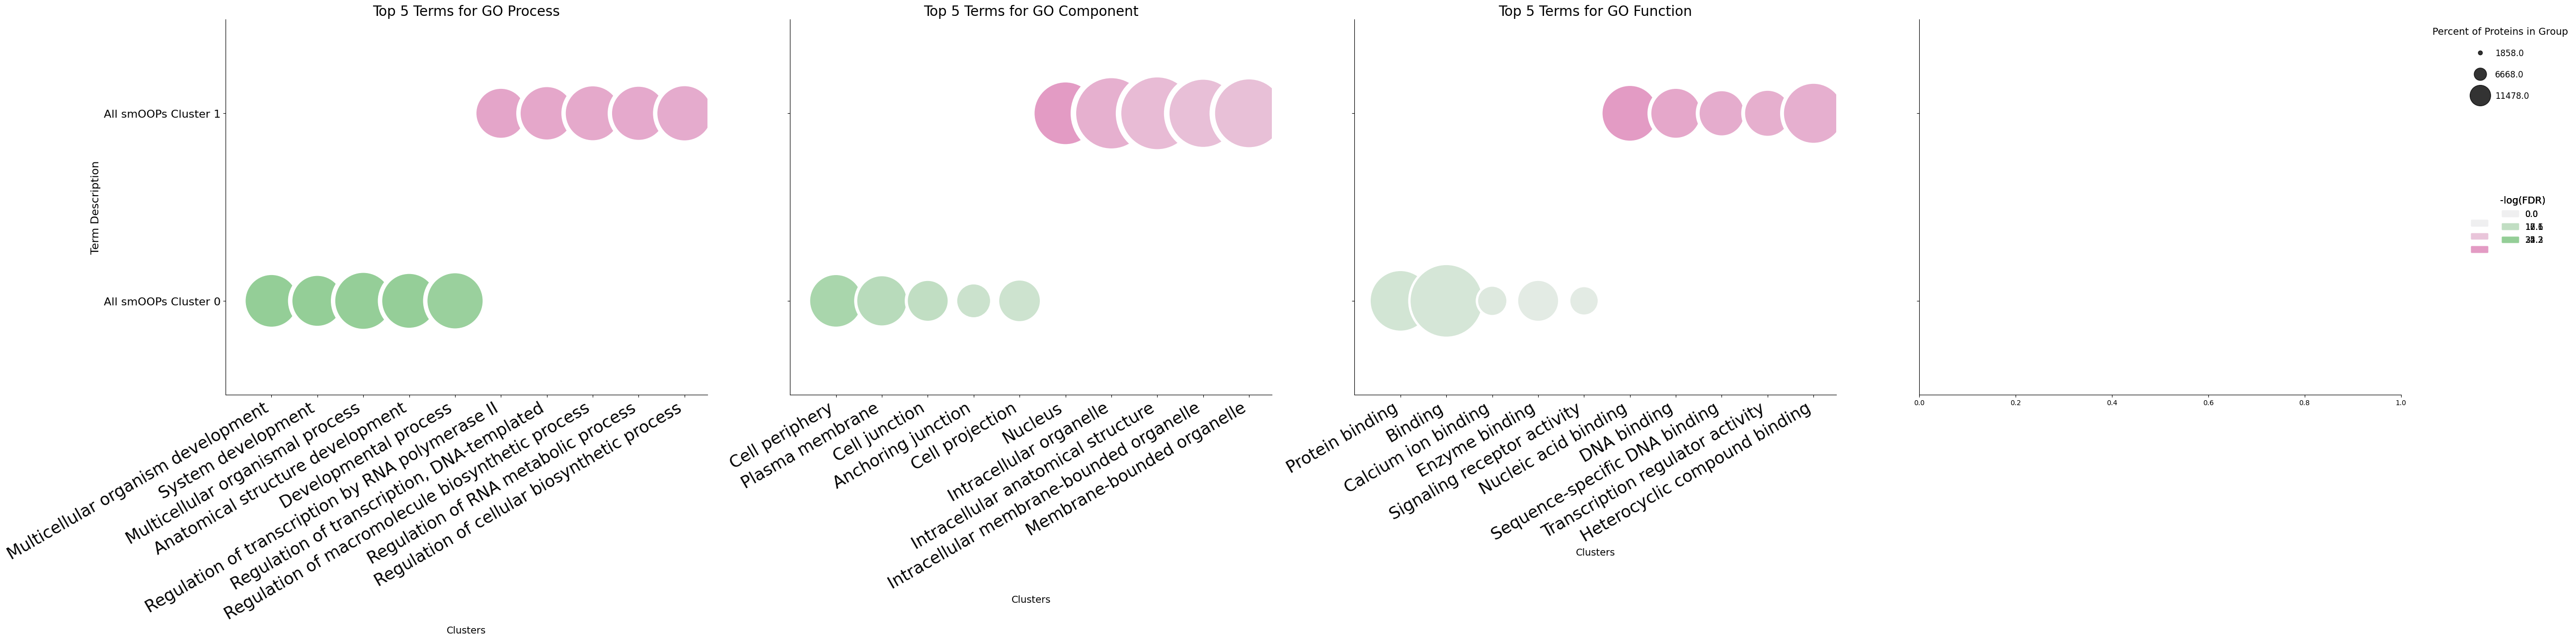

In [ ]:
def add_custom_legend(plot_data, max_log_fdr, sizes=(6, 30), cluster_colors=None):

    size_min = plot_data['Relative Gene Count'].min()
    size_max = plot_data['Relative Gene Count'].max()
    size_mid = (size_min + size_max) / 2

    size_handles = [
        mlines.Line2D([], [], color='black', marker='o', linestyle='None', alpha=0.8, markersize=sizes[0], label=f"{size_min:.1f}"),
        mlines.Line2D([], [], color='black', marker='o', linestyle='None', alpha=0.8, markersize=np.mean(sizes), label=f"{size_mid:.1f}"),
        mlines.Line2D([], [], color='black', marker='o', linestyle='None', alpha=0.8, markersize=sizes[1], label=f"{size_max:.1f}")
    ]

    for num, i in enumerate(cluster_colors):

        colors = ['#EFEFF0', cluster_colors[num]]
        cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)
        norm = Normalize(vmin=0, vmax=max_log_fdr) 
        color_min = 0
        color_mid = max_log_fdr / 2
        color_max = max_log_fdr 
        if num == 0:
            color_handles = [
                mpatches.Patch(color=cmap(norm(color_min)), label=f"{color_min:.1f}"),
                mpatches.Patch(color=cmap(norm(color_mid)), label=f"{color_mid:.1f}"),
                mpatches.Patch(color=cmap(norm(color_max)), label=f"{color_max:.1f}")
            ]
        else:
            color_handles = [
                mpatches.Patch(color=cmap(norm(color_min)), label=f""),
                mpatches.Patch(color=cmap(norm(color_mid)), label=f""),
                mpatches.Patch(color=cmap(norm(color_max)), label=f"")
            ]            
        if num == 0:
            color_legend = plt.legend(handles=color_handles, bbox_to_anchor=(1.19, 0.55), loc='upper left', title="-log(FDR)", frameon=False, fontsize=12, title_fontsize=14)
        else:
            color_legend = plt.legend(handles=color_handles, bbox_to_anchor=(1.13, 0.488), loc='upper left', title="", frameon=False, fontsize=12, title_fontsize=14)
        plt.gca().add_artist(color_legend)

    plt.legend(handles=size_handles, bbox_to_anchor=(1.05, 1), loc='upper left', title="Percent of Proteins in Group", labelspacing=1.5, frameon=False, fontsize=12, title_fontsize=14)

def merge_lists_with_preference(list1, list2):

    ordered_set = list1[:]
    
    for element in list2:
        if element not in ordered_set:
            ordered_set.append(element)
    
    return ordered_set

def plot_top_terms_dotplot_multiple_categories(df, size_dict, categories, top_n, y_order=None):

    n_categories = len(categories)

    fig, axes = plt.subplots(
        nrows=1, ncols=n_categories, figsize=(13 * n_categories, 13), sharey=True
    )
    abs_max = []
    for idx, category in enumerate(categories):
        if idx == 3:
            break
        ax = axes[idx]


        filtered_df = df[df['#category'] == category]

        top_terms = (
            filtered_df.groupby('Cluster')
            .apply(lambda x: x.nsmallest(top_n, 'false discovery rate')) 
            .reset_index(drop=True)
        )

        cluster_size_dict = size_dict
        top_terms['Cluster Size'] = top_terms['Cluster'].map(cluster_size_dict)
        top_terms['Relative Gene Count'] = (top_terms['observed gene count'] / top_terms['Cluster Size']) * 100
        top_terms['Relative Gene Count'] = top_terms['Relative Gene Count'].round(1)
        top_terms['observed gene count'] = (top_terms['observed gene count'] / top_terms['Cluster Size']) * 100

        plot_data = top_terms[['term description', 'Cluster', 'Relative Gene Count', 'false discovery rate', 'observed gene count']]
        plot_data['-log(FDR)'] = -np.log10(plot_data['false discovery rate']) 
        max_log_fdr = plot_data['-log(FDR)'].max()

        for cluster in df["Cluster"].unique():
            if cluster not in plot_data["Cluster"].unique():
                additional_row = pd.DataFrame({
                        "term description": "None",
                        "Cluster": [cluster],
                        "Relative Gene Count": [None],
                        "false discovery rate": [None],
                        "-log(FDR)": [None]
                    })
                plot_data = pd.concat([plot_data, additional_row], ignore_index=True)

        if y_order:
            plot_data['Cluster'] = pd.Categorical(
                plot_data['Cluster'],
                categories=y_order,
                ordered=True
            )

        x_order = []
        for i in y_order:
            term_list = plot_data[plot_data["Cluster"] == i]["term description"].tolist()
            x_order = merge_lists_with_preference(x_order, term_list)

        x_order = [x for x in x_order if x != "None"]
        x_order.append("None")

        plot_data['term description'] = pd.Categorical(
            plot_data['term description'],
            categories=x_order,
            ordered=True
        )

        cluster_colors = ["#94CE97", "#E39BC4"]

        plot_data["Relative Gene Count"] = (plot_data["Relative Gene Count"]*130)+1000

        abs_max.append(min(plot_data["Relative Gene Count"]))
        abs_max.append(max(plot_data["Relative Gene Count"]))
        for num, i in enumerate(cluster_colors):
            colors = ['#EFEFF0', i]
            cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)

            data_final = plot_data[plot_data["Cluster"].str.contains(f"Cluster {num}")]
            sizes = data_final["Relative Gene Count"]
            sizes = [int(s) for s in sizes]
            data_final['Relative Gene Count'] = pd.to_numeric(data_final['Relative Gene Count'], errors='coerce')

            scatter = sns.scatterplot(
                ax=ax,
                data=data_final,
                x="term description",
                y='Cluster',
                s = data_final["Relative Gene Count"].values,
                hue='-log(FDR)',
                palette=cmap,
                hue_norm=(0, max_log_fdr), 
                legend='full' if idx == n_categories - 1 else None, 
            )

        scatter.set_title(f"Top {top_n} Terms for {category}", fontsize=20)

        ax.tick_params(axis='x', rotation=30, labelsize=24)

        for label in ax.get_xticklabels():
            label.set_ha('right')

        ax.tick_params(axis='y', labelsize=16)

        add_custom_legend(plot_data, max_log_fdr, cluster_colors=cluster_colors)

        ax.set_xlim(-1.0, len(plot_data["term description"].unique()) - 0.5)
        ax.set_ylim(-0.5, len(plot_data['Cluster'].unique()) - 0.5)

    fig.tight_layout()
    sns.despine()
    plt.show()

plot_top_terms_dotplot_multiple_categories(all_enrichment, 
                       size_dict, 
                       categories=['GO Process', 'GO Component', 'GO Function', 'UniProt Keywords'],
                       top_n=5,
                       y_order=[
                                "All smOOPs Cluster 0", 
                                "All smOOPs Cluster 1"
                                ]
                      )


In [7]:
cluster0_all = pd.read_csv('/ceph/hpc/home/novljanj/data_storage/projects/smOOPS_paper/Data/STRING_GO_analysis/enrichment.new_cluster0.tsv', sep='\t')
cluster1_all = pd.read_csv('/ceph/hpc/home/novljanj/data_storage/projects/smOOPS_paper/Data/STRING_GO_analysis/enrichment.new_cluster1.tsv', sep='\t')

cluster1_all["Cluster"] = "All smOOPs Cluster 1"
cluster0_all["Cluster"] = "All smOOPs Cluster 0"

size_dict = {
            "All smOOPs Cluster 1": 324, 
            "All smOOPs Cluster 0": 1038, 
             }

all_enrichment = pd.concat([cluster0_all, cluster1_all])
all_enrichment["#category"].unique()
all_enrichment

,#category,term ID,term description,observed gene count,background gene count,strength,signal,false discovery rate,matching proteins in your network (IDs),matching proteins in your network (labels),Cluster
0,GO Process,GO:0007275,Multicellular organism development,447,3154,0.25,1.12,5.980000e-33,"10090.ENSMUSP00000000312,10090.ENSMUSP00000000...","Cdh1,Cdh4,Sec24b,Col6a1,Pcnt,Fkbp10,Ltbp1,Supt...",All smOOPs Cluster 0
1,GO Process,GO:0048731,System development,415,2836,0.26,1.15,9.880000e-33,"10090.ENSMUSP00000000312,10090.ENSMUSP00000000...","Cdh1,Cdh4,Sec24b,Pcnt,Fkbp10,Ltbp1,Kdm7a,Ppard...",All smOOPs Cluster 0
2,GO Process,GO:0032501,Multicellular organismal process,531,4102,0.21,1.03,1.220000e-32,"10090.ENSMUSP00000000312,10090.ENSMUSP00000000...","Cdh1,Cdh4,Sec24b,Col6a1,Pcnt,Jup,Fkbp10,Ltbp1,...",All smOOPs Cluster 0
3,GO Process,GO:0048856,Anatomical structure development,489,3632,0.23,1.07,1.220000e-32,"10090.ENSMUSP00000000312,10090.ENSMUSP00000000...","Cdh1,Cdh4,Hk2,Sec24b,Col6a1,Pcnt,Jup,Fkbp10,Lt...",All smOOPs Cluster 0
4,GO Process,GO:0032502,Developmental process,515,3989,0.21,1.02,6.820000e-31,"10090.ENSMUSP00000000312,10090.ENSMUSP00000000...","Cdh1,Cdh4,Hk2,Sec24b,Col6a1,Pcnt,Jup,Fkbp10,Lt...",All smOOPs Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...
122,InterPro,IPR036236,Zinc finger C2H2 superfamily,74,597,0.70,2.08,7.410000e-26,"10090.ENSMUSP00000008830,10090.ENSMUSP00000012...","Zfp955a,Zfp729b,Scaper,Zfp51,Zfp458,Zfp759,Zfp...",All smOOPs Cluster 1
123,InterPro,IPR013087,Zinc finger C2H2-type,75,635,0.68,2.00,3.660000e-25,"10090.ENSMUSP00000008830,10090.ENSMUSP00000012...","Zfp955a,Zfp729b,Scaper,Zfp51,Zfp458,Zfp759,Zfp...",All smOOPs Cluster 1
124,InterPro,IPR003395,"RecF/RecN/SMC, N-terminal",4,5,1.51,0.36,4.550000e-02,"10090.ENSMUSP00000025930,10090.ENSMUSP00000044...","Smc3,Smc1a,Smc2,Smc5",All smOOPs Cluster 1
125,SMART,SM00349,Krueppel associated box,66,326,0.91,3.19,2.790000e-34,"10090.ENSMUSP00000008830,10090.ENSMUSP00000012...","Zfp955a,Zfp729b,Zfp51,Zfp458,Zfp759,Zfp943,Zfp...",All smOOPs Cluster 1


In [12]:
all_enrichment = all_enrichment[all_enrichment["#category"].isin(['GO Process', 'GO Component', 'GO Function'])]

In [13]:
unique_clusters = all_enrichment['Cluster'].unique()

cluster_0, cluster_1 = unique_clusters

grouped = all_enrichment.groupby(['#category', 'Cluster'])

category_dict = {}

for (category, cluster), group in grouped:
    if category not in category_dict:
        category_dict[category] = {}
    category_dict[category][cluster] = set(group['term description'])

for category, clusters in category_dict.items():
    if cluster_0 in clusters and cluster_1 in clusters:
        set_0 = clusters[cluster_0]
        set_1 = clusters[cluster_1]

        common_terms = set_0 & set_1
        only_cluster_0 = set_0 - set_1
        only_cluster_1 = set_1 - set_0

        print(f"\nCategory: {category}")

        max_left_length = max((len(term) for term in only_cluster_0), default=0)
        col_width = max_left_length + 5
        
        print(f"{'Cluster 0 Only':<{col_width}}{'Common':<{col_width}}{'Cluster 1 Only':<{col_width}}")
        print("=" * (col_width * 3))

        max_len = max(len(only_cluster_0), len(common_terms), len(only_cluster_1))
        cluster_0_list = list(only_cluster_0)
        common_list = list(common_terms)
        cluster_1_list = list(only_cluster_1)

        for i in range(max_len):
            col_0 = cluster_0_list[i] if i < len(cluster_0_list) else ""
            col_common = common_list[i] if i < len(common_list) else ""
            col_1 = cluster_1_list[i] if i < len(cluster_1_list) else ""
            print(f"{col_0:<{col_width}}{col_common:<{col_width}}{col_1:<{col_width}}")


Category: GO Component
Cluster 0 Only                                       Common                                               Cluster 1 Only                                       
Basal part of cell                                   Supramolecular complex                               Nucleus                                              
Lateral plasma membrane                              Intracellular non-membrane-bounded organelle         Chromosome, centromeric region                       
Growth cone                                                                                               Intracellular organelle                              
Apical part of cell                                                                                       Chromosomal region                                   
Cell periphery                                                                                            Cohesin complex                                      
Cell junction   

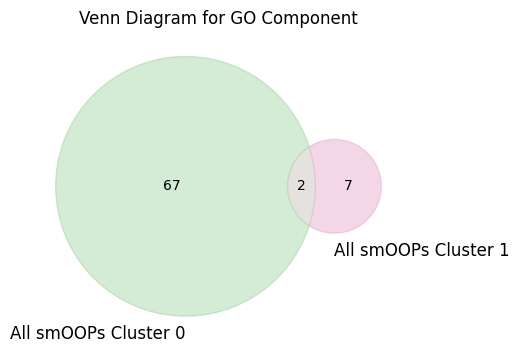

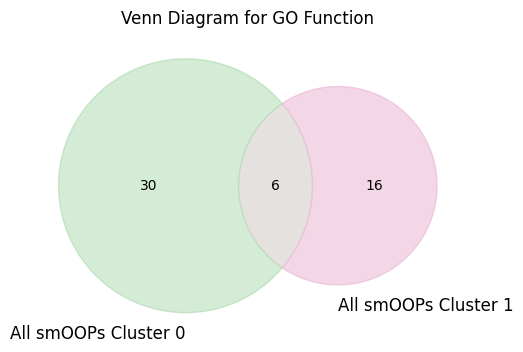

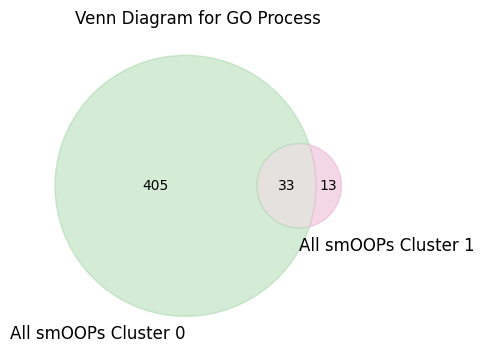

In [14]:
unique_clusters = all_enrichment['Cluster'].unique()

cluster_0, cluster_1 = unique_clusters

cluster_colors = {
    cluster_0: "#94CE97",
    cluster_1: "#E39BC4"
}

grouped = all_enrichment.groupby(['#category', 'Cluster'])

category_dict = {}

for (category, cluster), group in grouped:
    if category not in category_dict:
        category_dict[category] = {}
    category_dict[category][cluster] = set(group['term description'])

for category, clusters in category_dict.items():
    if category in ['GO Process', 'GO Component', 'GO Function', 'UniProt Keywords', 'InterPro']:
        if cluster_0 in clusters and cluster_1 in clusters:
            set_0 = clusters[cluster_0]
            set_1 = clusters[cluster_1]

            plt.figure(figsize=(6, 4))
            venn = venn2([set_0, set_1], set_labels=(cluster_0, cluster_1))

            venn.get_patch_by_id('10').set_edgecolor(cluster_colors[cluster_0])
            venn.get_patch_by_id('10').set_facecolor(cluster_colors[cluster_0])
            
            venn.get_patch_by_id('01').set_edgecolor(cluster_colors[cluster_1])
            venn.get_patch_by_id('01').set_facecolor(cluster_colors[cluster_1])
            
            if len(set_0 & set_1) > 0:
                venn.get_patch_by_id('11').set_facecolor("#BCB5AE")  # Optional: Overlap region
            
            plt.title(f'Venn Diagram for {category}')
            plt.show()